### ML Assignment - Supervised Regression

1. installing required libraires 

In [4]:
pip install numpy tensorflow matplotlib

  Using cached keras-3.4.1-py3-none-any.whl (1.1 MB)
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
  Using cached namex-0.0.8-py3-none-any.whl (5.8 kB)
  Using cached Markdown-3.6-py3-none-any.whl (105 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl (2.4 kB)
Note: you may need to restart the kernel to use updated packages.


2. Importing all libraires

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
import matplotlib.pyplot as plt

3. Generating 50*50 Image with values of 255(White) for 1 pixel and remaing with 0(Black) values 

In [26]:
def generate_image(size=50):
    image = np.zeros((size, size), dtype=np.uint8)
    x, y = np.random.randint(0, size, size=2)
    image[x, y] = 255
    return image

4. Creating dataset using above image.

In [28]:
# Number of images to generate
num_images = 1000

# Generate the dataset
dataset = []
for _ in range(num_images):
    image = generate_image()
    dataset.append(image)

# Convert list to numpy array
dataset = np.array(dataset)

In [29]:
# Generating training and validation datasets
train_samples = 10000
val_samples = 2000
img_size = 50

train_images, train_labels = generate_dataset(train_samples, img_size)
val_images, val_labels = generate_dataset(val_samples, img_size)


In [30]:
# Normalize the images: Image values converted into 0 to 1 
train_images = train_images / 255.0
val_images = val_images / 255.0

5. Defining the CNN Model.

In [31]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='linear')  # Output layer for x and y coordinates
])

In [32]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

6. Traning the model with 10 epochs.

In [33]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels))

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 91ms/step - loss: 236.7280 - val_loss: 8.0150
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step - loss: 5.7984 - val_loss: 2.7447
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 91ms/step - loss: 2.2473 - val_loss: 1.1777
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 93ms/step - loss: 1.1838 - val_loss: 0.8072
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - loss: 0.7499 - val_loss: 0.6137
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - loss: 0.5523 - val_loss: 0.8024
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - loss: 0.4711 - val_loss: 0.3555
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 96ms/step - loss: 0.4680 - val_loss: 0.3740
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 115ms/step - loss: 0.3482 - val_loss: 0.2550
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 120ms/step - loss: 0.3283 - val_loss: 0.3569


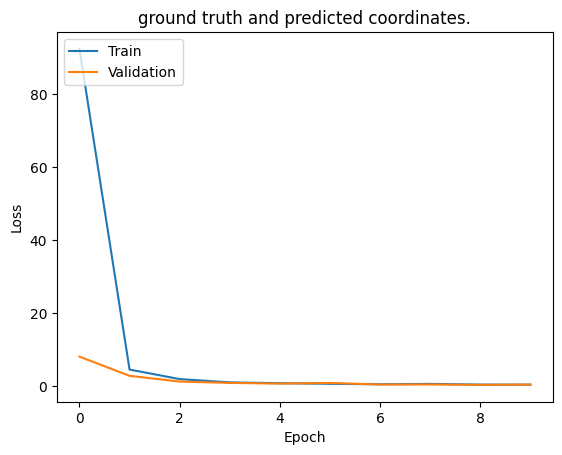

In [38]:
# graphs showing ground truth and predicted coordinates.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ground truth and predicted coordinates.')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [35]:
# Test the model on a 5 validation samples
for i in range(5):
    sample_image = val_images[i].reshape(1, img_size, img_size, 1)
    true_label = val_labels[i]
    predicted_label = model.predict(sample_image)
    print(f'True Label: {true_label}, Predicted Label: {predicted_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
True Label: [14. 21.], Predicted Label: [[13.990383 21.897919]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
True Label: [46.  0.], Predicted Label: [[46.50756    1.2602931]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
True Label: [11. 25.], Predicted Label: [[11.823081 25.078773]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
True Label: [12.  7.], Predicted Label: [[12.437629  6.423996]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
True Label: [29. 36.], Predicted Label: [[29.70337 36.81642]]


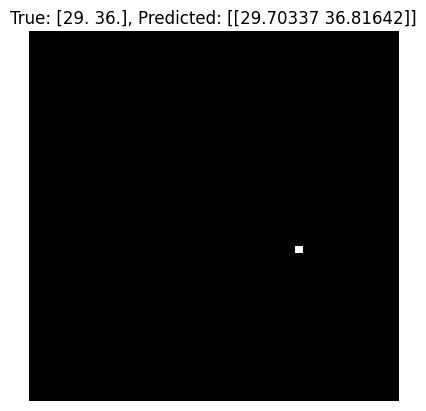

In [36]:
# Visualize the sample image
plt.imshow(sample_image.reshape(img_size, img_size), cmap='gray')
plt.title(f'True: {true_label}, Predicted: {predicted_label}')
plt.axis('off')
plt.show()